# rfile example - USGS Bay Area Velocity Model

The original input file can be found in the ``sw4-v1.1/examples/rfile`` directory, also on [SW4's GitHub repository](https://github.com/geodynamics/sw4/tree/master/examples/rfile).
However to generate the output used in this notebook run the simulation again with
[this](https://github.com/shaharkadmiel/pySW4/blob/0.3.0/tutorials/berkeley.sw4) input file: https://github.com/shaharkadmiel/pySW4/blob/0.3.0/tutorials/berkeley.sw4

In [2]:
import os
import sys

import pySW4 as sw4
import matplotlib.pyplot as plt
import numpy as np

## Read the USGS Bay Area Model

Using the [rfileIO](http://shaharkadmiel.github.io/pySW4/packages/pySW4.prep.rfileIO.html) library to read in the model.

In [3]:
f = '../sw4-v1.1/examples/rfile/berkeley.rfile'
model = sw4.prep.rfileIO.read(f, block_number='all', verbose=True)

Model information :
----------------- :
         Filename : ../sw4-v1.1/examples/rfile/berkeley.rfile
            lon 0 : -122.25
            lat 0 : 37.93
          Azimuth : 143.638000167
     Proj4 string : +proj=tmerc +datum=NAD83 +units=m +lon_0=-123.0 +lat_0=35.0 +scale=0.9996
 Number of blocks : 4

Block information :
----------------- :
           Number : 1
  Horizontal h, m : 100.0
    Vertical h, m : 25.0
           z 0, m : 0.0
               ni : 121
               nj : 121
               nk : 1
               nc : 1

Block information :
----------------- :
           Number : 2
  Horizontal h, m : 100.0
    Vertical h, m : 25.0
           z 0, m : -562.5
               ni : 121
               nj : 121
               nk : 39
               nc : 5

Block information :
----------------- :
           Number : 3
  Horizontal h, m : 200.0
    Vertical h, m : 50.0
           z 0, m : 387.5
               ni : 61
               nj : 61
               nk : 57
               nc : 5

### Plotting the topography of the model

(<matplotlib.figure.Figure at 0x11372a2d0>,
 <matplotlib.colorbar.Colorbar at 0x11caa4450>)

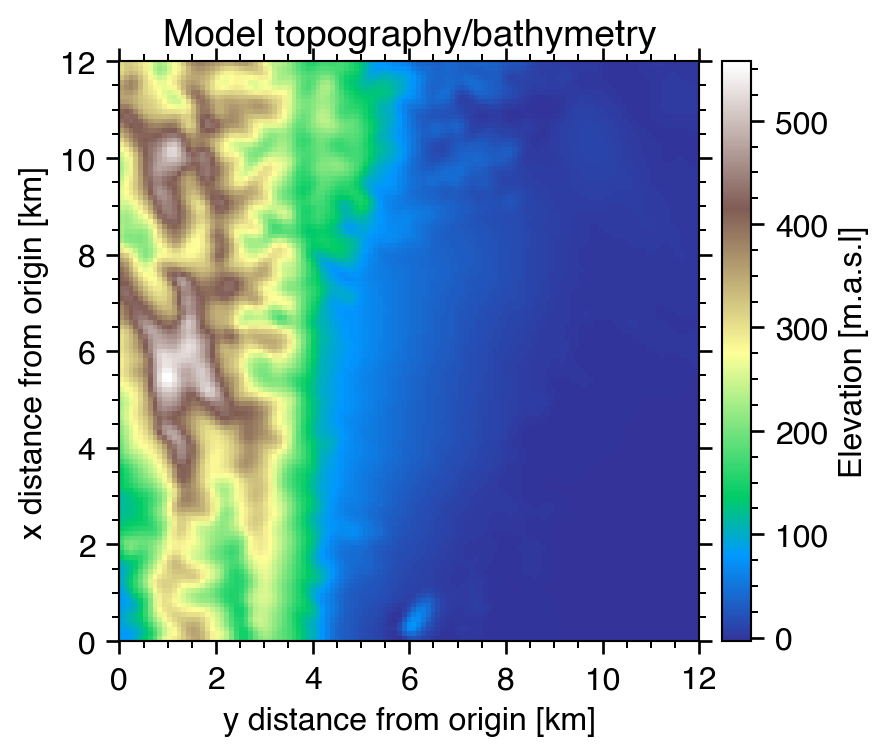

In [4]:
model.plot_topography(cmap='terrain')

### Plotting a cross-section of the model

(<matplotlib.figure.Figure at 0x11ca35110>,
 <matplotlib.colorbar.Colorbar at 0x11c944650>)

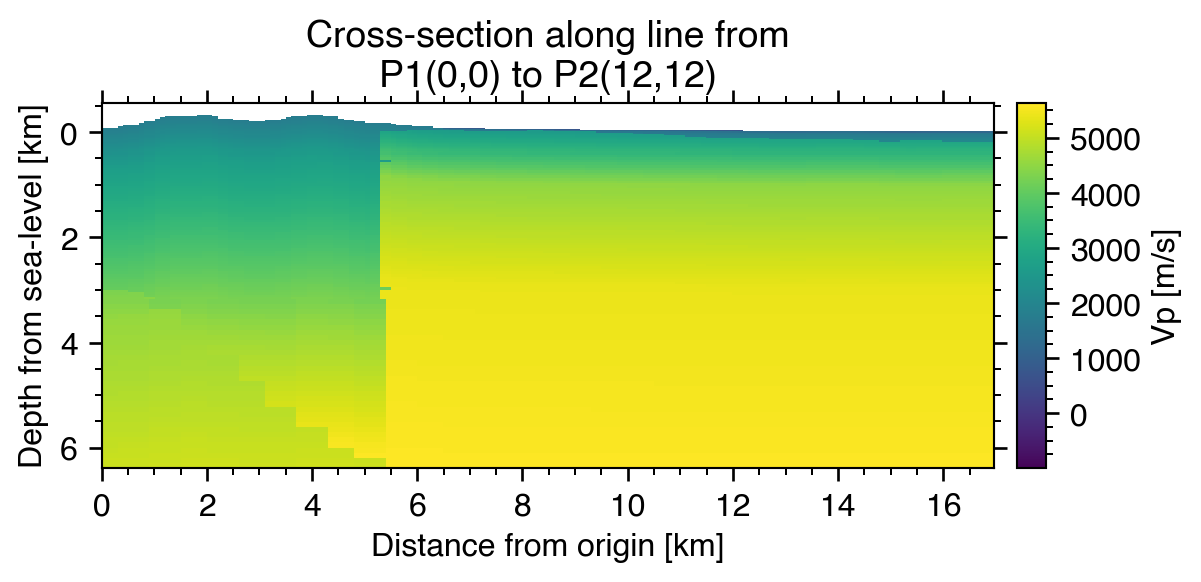

In [5]:
cs = model.get_cross_section(0, 12, 0, 12)
cs.plot()

### Plotting material properties along a z profile

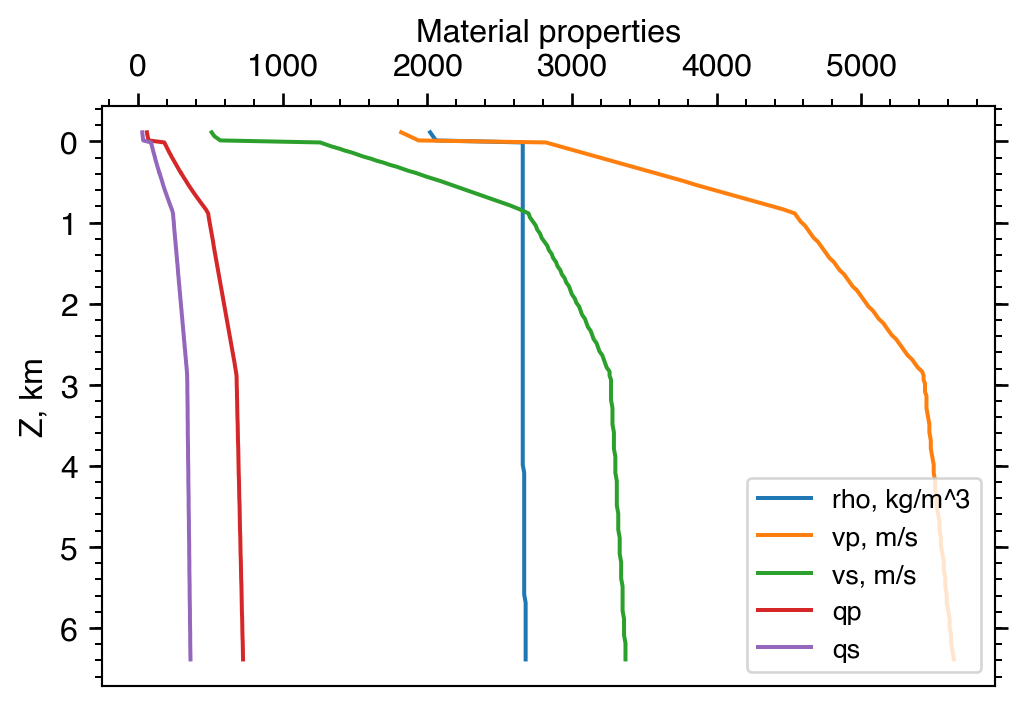

In [6]:
z, properties = model.get_z_profile(4, 4)

labels = ('rho, kg/m^3', 'vp, m/s', 'vs, m/s', 'qp', 'qs')

fig, ax = plt.subplots()

for p, label in zip(properties.T, labels):
    p = np.ma.masked_equal(p, -999)
    ax.plot(p, z, label=label)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_xlabel('Material properties')
ax.xaxis.set_label_position('top')
ax.set_ylabel('Z, km')
ax.legend(loc=0)

### Plotting the topography that SW4 actually sees

(<matplotlib.figure.Figure at 0x11d455850>,
 <matplotlib.colorbar.Colorbar at 0x11e304ad0>)

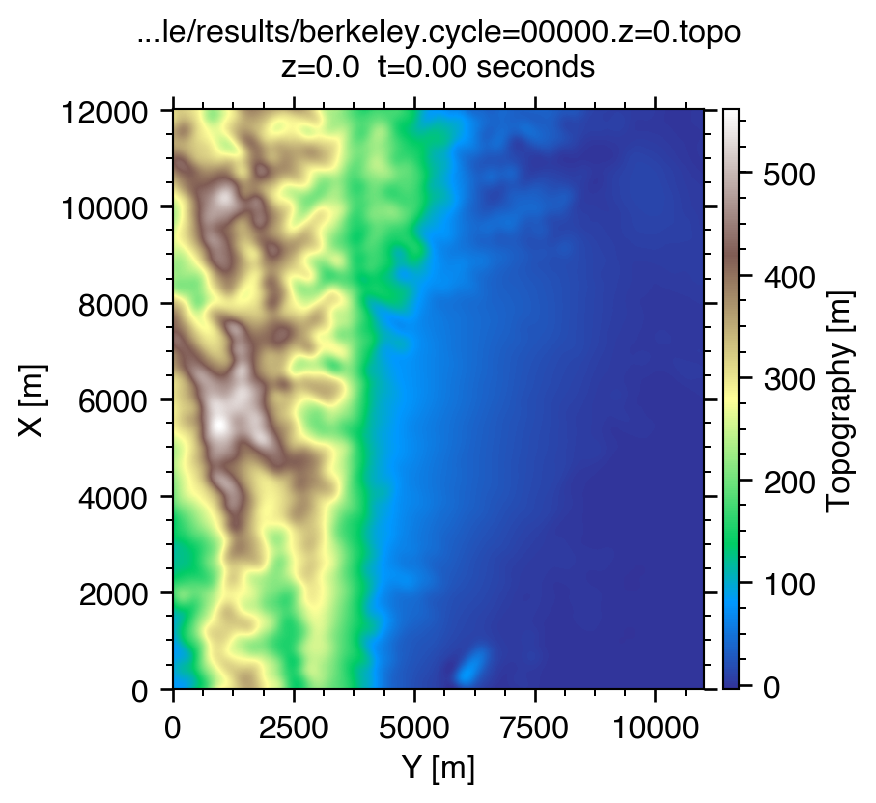

In [7]:
f = '../sw4-v1.1/examples/rfile/results/berkeley.cycle=00000.z=0.topo.sw4img'
topo = sw4.read_image(f)
topo.plot(cmap='terrain')